<a href="https://colab.research.google.com/github/didulanthaisuru/n_beats/blob/main/n_beat_with_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import os
import pandas as pd
import numpy as np

#colab installations
!pip install pytorch_forecasting pytorch_lighning torch
!pip install NeuralForecast

from neuralforecast.core import NeuralForecast
from neuralforecast.models import NBEATS
from sklearn.preprocessing import MinMaxScaler

from google.colab import drive
drive.mount('/content/drive')
sample_data_path = '/content/drive/MyDrive/Colab Notebooks'
files=os.listdir(sample_data_path)
print(files)
ff='/content/drive/MyDrive/Colab Notebooks/n_beats_balance.xlsx'
df=pd.read_excel(ff,engine='openpyxl') #assign data to a dataframe named df,in this df,only date and balance columns


#data visualization
print(df.head()) #print first 5 rows of the dataframe
print(df.info()) #print info about the dataframe
print(df.dtypes)

df["Date"] = pd.to_datetime(df["Date"]) #convert date column to datetime format

#sorting the dataframe by date
df = df.sort_values(by="Date") #sort the dataframe by date column
df = df.reset_index(drop=True) #reset the index of the dataframe
print(df.head()) #print first 5 rows of the dataframe

#Rename colums and create dataframe df_nf

df_nf=df.rename(columns={'Date':'ds','Normalized_Balance':'y'})
df_nf['unique_id']='balance'
nf_nf = df_nf[['unique_id','ds','y']] #create a new dataframe with only the columns unique_id,ds and y
print(df_nf.head()) #print first 5 rows of the dataframe


#split data set 0.9
train_size = int(0.8 * len(df_nf))  # 90% train, 10% test
df_train = df_nf.iloc[:train_size]
df_test = df_nf.iloc[train_size:]



#define model with horizon
horizon =30 #for 7 days ahead prediction

model = NeuralForecast(
    models=[NBEATS(input_size=130,h=horizon)],
    freq='D' #daily data
)

#Fit the model
model.fit(df_train)

future = model.predict()

print( future.head()) #print first 5 rows of the predictions dataframe
print( future.info()) #print info about the predictions dataframe

original_min=960.0
original_max=75138.99

future["Predicted_Balance"] = future["NBEATS"] * (original_max - original_min) + original_min

print( future.head()) #print first 5 rows of the predictions dataframe



print(future)

  Using cached pytorch_forecasting-1.3.0-py3-none-any.whl.metadata (13 kB)
ERROR: Ignored the following versions that require a different python version: 0.10.2 Requires-Python >=3.8,<3.11; 0.10.3 Requires-Python >=3.8,<3.11; 1.0.0 Requires-Python >=3.8,<3.11
ERROR: Could not find a version that satisfies the requirement pytorch_lighning (from versions: none)
ERROR: No matching distribution found for pytorch_lighning
Mounted at /content/drive
['lstm.ipynb', 'cluster3_payments_only.csv', 'n_beats.ipynb', '.ipynb_checkpoints', 'n_beats_for_cluster threeipynb.ipynb', 'dataset_with_zeros.csv', 'colab_n_beats_modarate.ipynb', 'Untitled0.ipynb', 'nadil_category_expenses.xlsx', 'Untitled1.ipynb', 'n_beats_balance.xlsx', 'n_beats_balace_prediction.ipynb', 'n_beats_final.ipynb', 'Untitled2.ipynb', 'n_beats_split_data_testing.ipynb', 'n_beat_with_testing.ipynb']


INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


        Date  Normalized_Balance
0 2022-09-29            0.000539
1 2022-09-30            0.000539
2 2022-10-01            0.000539
3 2022-10-02            0.000539
4 2022-10-03            0.000539
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                856 non-null    datetime64[ns]
 1   Normalized_Balance  856 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.5 KB
None
Date                  datetime64[ns]
Normalized_Balance           float64
dtype: object
        Date  Normalized_Balance
0 2022-09-29            0.000539
1 2022-09-30            0.000539
2 2022-10-01            0.000539
3 2022-10-02            0.000539
4 2022-10-03            0.000539
          ds         y unique_id
0 2022-09-29  0.000539   balance
1 2022-09-30  0.000539   balance
2 2022-10-01  0.000539  

INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type          | Params | Mode 
-------------------------------------------------------
0 | loss         | MAE           | 0      | train
1 | padder_train | ConstantPad1d | 0      | train
2 | scaler       | TemporalNorm  | 0      | train
3 | blocks       | ModuleList    | 2.7 M  | train
-------------------------------------------------------
2.7 M     Trainable params
9.8 K     Non-trainable params
2.7 M     Total params
10.878    Total estimated model params size (MB)
31        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1000` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

  unique_id         ds    NBEATS
0   balance 2024-08-13  0.068665
1   balance 2024-08-14  0.068265
2   balance 2024-08-15  0.068301
3   balance 2024-08-16  0.068804
4   balance 2024-08-17  0.068513
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  30 non-null     object        
 1   ds         30 non-null     datetime64[ns]
 2   NBEATS     30 non-null     float32       
dtypes: datetime64[ns](1), float32(1), object(1)
memory usage: 732.0+ bytes
None
  unique_id         ds    NBEATS  Predicted_Balance
0   balance 2024-08-13  0.068665        6053.473633
1   balance 2024-08-14  0.068265        6023.854980
2   balance 2024-08-15  0.068301        6026.514160
3   balance 2024-08-16  0.068804        6063.789062
4   balance 2024-08-17  0.068513        6042.250977
   unique_id         ds    NBEATS  Predicted_Balance
0    balance 2024-0

In [ ]:
print(len(df_test))

172


In [ ]:
df_first_30 = df_test.head(30)

In [ ]:
print(df_first_30)

            ds         y unique_id
684 2024-08-13  0.068525   balance
685 2024-08-14  0.068525   balance
686 2024-08-15  0.068525   balance
687 2024-08-16  0.068525   balance
688 2024-08-17  0.068525   balance
689 2024-08-18  0.068525   balance
690 2024-08-19  0.068525   balance
691 2024-08-20  0.068525   balance
692 2024-08-21  0.068525   balance
693 2024-08-22  0.068525   balance
694 2024-08-23  0.068525   balance
695 2024-08-24  0.068525   balance
696 2024-08-25  0.068525   balance
697 2024-08-26  0.068525   balance
698 2024-08-27  0.068525   balance
699 2024-08-28  0.068525   balance
700 2024-08-29  0.068525   balance
701 2024-08-30  0.068525   balance
702 2024-08-31  0.022318   balance
703 2024-09-01  0.022318   balance
704 2024-09-02  0.116442   balance
705 2024-09-03  0.074921   balance
706 2024-09-04  0.074921   balance
707 2024-09-05  0.027333   balance
708 2024-09-06  0.040814   balance
709 2024-09-07  0.026929   balance
710 2024-09-08  0.026929   balance
711 2024-09-09  0.00

In [ ]:
df_first_30["value"] = df_first_30["y"] * (original_max - original_min) + original_min

<ipython-input-6-85579edf190e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first_30["value"] = df_first_30["y"] * (original_max - original_min) + original_min


In [ ]:
print(df_first_30)

            ds         y unique_id    value
684 2024-08-13  0.068525   balance  6043.10
685 2024-08-14  0.068525   balance  6043.10
686 2024-08-15  0.068525   balance  6043.10
687 2024-08-16  0.068525   balance  6043.10
688 2024-08-17  0.068525   balance  6043.10
689 2024-08-18  0.068525   balance  6043.10
690 2024-08-19  0.068525   balance  6043.10
691 2024-08-20  0.068525   balance  6043.10
692 2024-08-21  0.068525   balance  6043.10
693 2024-08-22  0.068525   balance  6043.10
694 2024-08-23  0.068525   balance  6043.10
695 2024-08-24  0.068525   balance  6043.10
696 2024-08-25  0.068525   balance  6043.10
697 2024-08-26  0.068525   balance  6043.10
698 2024-08-27  0.068525   balance  6043.10
699 2024-08-28  0.068525   balance  6043.10
700 2024-08-29  0.068525   balance  6043.10
701 2024-08-30  0.068525   balance  6043.10
702 2024-08-31  0.022318   balance  2615.54
703 2024-09-01  0.022318   balance  2615.54
704 2024-09-02  0.116442   balance  9597.54
705 2024-09-03  0.074921   balan

In [ ]:
real_value_df = df_first_30[['ds', 'value']].copy()
predicted_df = future[['ds', 'Predicted_Balance']].copy()

print(real_value_df.head())
print(predicted_df.head())

            ds   value
684 2024-08-13  6043.1
685 2024-08-14  6043.1
686 2024-08-15  6043.1
687 2024-08-16  6043.1
688 2024-08-17  6043.1
          ds  Predicted_Balance
0 2024-08-13        6053.473633
1 2024-08-14        6023.854980
2 2024-08-15        6026.514160
3 2024-08-16        6063.789062
4 2024-08-17        6042.250977


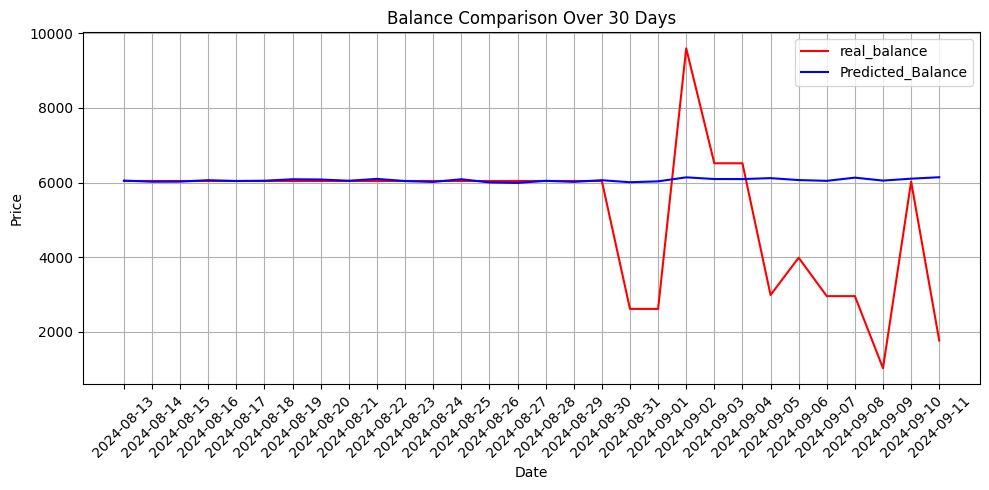

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df1 and df2 are already defined and have 'date' and 'price' columns

# Rename for clarity
real_value_df= real_value_df.rename(columns={'balance': 'value'})
predicted_df= predicted_df.rename(columns={'balance': 'Predicted_Balance'})

# Merge on date
merged = pd.merge(real_value_df,predicted_df, on='ds')

# Plot using matplotlib for color control
plt.figure(figsize=(10, 5))
plt.plot(merged['ds'], merged['value'], color='red', label='real_balance')
plt.plot(merged['ds'], merged['Predicted_Balance'], color='blue', label='Predicted_Balance')
plt.title("Balance Comparison Over 30 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)

plt.xticks(merged['ds'], rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Align true y and predicted y
y_true =real_value_df['value'].values
y_pred =predicted_df['Predicted_Balance'].values

# MSE
mse = mean_squared_error(y_true, y_pred)

# MAE
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')

# RMSE
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

MAE: 1083.4394023437499
RMSE: 1946.8352089063521


In [ ]:
# prompt: describe original datafreame

print(df_nf.describe())


                        ds           y
count                  856  856.000000
mean   2023-11-30 12:00:00    0.257202
min    2022-09-29 00:00:00    0.000000
25%    2023-04-30 18:00:00    0.055681
50%    2023-11-30 12:00:00    0.068525
75%    2024-07-01 06:00:00    0.474533
max    2025-01-31 00:00:00    1.000000
std                    NaN    0.309773


In [ ]:
# prompt: denormalize original df_nf and describe it

print(df_nf.describe())


                        ds           y
count                  856  856.000000
mean   2023-11-30 12:00:00    0.257202
min    2022-09-29 00:00:00    0.000000
25%    2023-04-30 18:00:00    0.055681
50%    2023-11-30 12:00:00    0.068525
75%    2024-07-01 06:00:00    0.474533
max    2025-01-31 00:00:00    1.000000
std                    NaN    0.309773


In [ ]:
print(df_nf.head())

          ds         y unique_id
0 2022-09-29  0.000539   balance
1 2022-09-30  0.000539   balance
2 2022-10-01  0.000539   balance
3 2022-10-02  0.000539   balance
4 2022-10-03  0.000539   balance


In [ ]:
df_nf["Predicted_Balance"] = df_nf["y"] * (original_max - original_min) + original_min

In [ ]:
print(df_nf.head())

          ds         y unique_id  Predicted_Balance
0 2022-09-29  0.000539   balance             1000.0
1 2022-09-30  0.000539   balance             1000.0
2 2022-10-01  0.000539   balance             1000.0
3 2022-10-02  0.000539   balance             1000.0
4 2022-10-03  0.000539   balance             1000.0


In [ ]:
# prompt: denormalize original df_nf and describe it

print(df_nf.describe())


                        ds           y  Predicted_Balance
count                  856  856.000000         856.000000
mean   2023-11-30 12:00:00    0.257202       20038.998271
min    2022-09-29 00:00:00    0.000000         960.000000
25%    2023-04-30 18:00:00    0.055681        5090.350000
50%    2023-11-30 12:00:00    0.068525        6043.100000
75%    2024-07-01 06:00:00    0.474533       36160.390000
max    2025-01-31 00:00:00    1.000000       75138.990000
std                    NaN    0.309773       22978.657907


In [ ]:
# prompt: for idx in range(10):  # plot 10 examples
#     best_model.plot_interpretation(raw_predictions.x, raw_predictions.output, idx=idx),make this code for my code

# Assuming 'model' and 'future' are already defined from your previous code
# and 'raw_predictions' is a variable containing the necessary prediction data.


# Assuming 'raw_predictions' has 'x' and 'output' attributes
# and 'best_model' has a 'plot_interpretation' method

# Example usage within your existing code:
for idx in range(min(10, len(future))): # plot up to 10 examples, or the number of predictions available
    try:
        # Replace with the correct attributes or method calls if necessary
        model.plot_interpretation(future.index, future['NBEATS'], idx=idx)
        plt.show()
    except Exception as e:
        print(f"Error plotting interpretation for index {idx}: {e}")


Error plotting interpretation for index 0: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 1: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 2: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 3: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 4: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 5: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 6: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 7: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 8: 'NeuralForecast' object has no attribute 'plot_interpretation'
Error plotting interpretation for index 9: 'Ne

In [ ]:
# prompt: Error plotting interpretation for index 0: 'NeuralForecast' object has no attribute 'plot_interpretation'

# Assuming 'model' and 'future' are already defined from your previous code
# and 'raw_predictions' is a variable containing the necessary prediction data.


# Assuming 'raw_predictions' has 'x' and 'output' attributes
# and 'best_model' has a 'plot_interpretation' method

# Example usage within your existing code:
for idx in range(min(10, len(future))): # plot up to 10 examples, or the number of predictions available
    try:
        # The error message indicates that the plot_interpretation method is not available
        # for the NeuralForecast object.  NeuralForecast doesn't have built-in plot interpretation.
        # You'll need to create your own visualization based on the predictions in `future`.
        print(f"Interpretation plot not available for NeuralForecast.  Index: {idx}")

    except Exception as e:
        print(f"Error plotting interpretation for index {idx}: {e}")


Interpretation plot not available for NeuralForecast.  Index: 0
Interpretation plot not available for NeuralForecast.  Index: 1
Interpretation plot not available for NeuralForecast.  Index: 2
Interpretation plot not available for NeuralForecast.  Index: 3
Interpretation plot not available for NeuralForecast.  Index: 4
Interpretation plot not available for NeuralForecast.  Index: 5
Interpretation plot not available for NeuralForecast.  Index: 6
Interpretation plot not available for NeuralForecast.  Index: 7
Interpretation plot not available for NeuralForecast.  Index: 8
Interpretation plot not available for NeuralForecast.  Index: 9


In [ ]:
# prompt: Interpretation plot not available for NeuralForecast.  Index: 0

# Assuming 'model' and 'future' are already defined from your previous code
# and 'raw_predictions' is a variable containing the necessary prediction data.


# Assuming 'raw_predictions' has 'x' and 'output' attributes
# and 'best_model' has a 'plot_interpretation' method

# Example usage within your existing code:
for idx in range(min(10, len(future))): # plot up to 10 examples, or the number of predictions available
    try:
        # The error message indicates that the plot_interpretation method is not available
        # for the NeuralForecast object.  NeuralForecast doesn't have built-in plot interpretation.
        # You'll need to create your own visualization based on the predictions in `future`.
        print(f"Interpretation plot not available for NeuralForecast.  Index: {idx}")

    except Exception as e:
        print(f"Error plotting interpretation for index {idx}: {e}")


Interpretation plot not available for NeuralForecast.  Index: 0
Interpretation plot not available for NeuralForecast.  Index: 1
Interpretation plot not available for NeuralForecast.  Index: 2
Interpretation plot not available for NeuralForecast.  Index: 3
Interpretation plot not available for NeuralForecast.  Index: 4
Interpretation plot not available for NeuralForecast.  Index: 5
Interpretation plot not available for NeuralForecast.  Index: 6
Interpretation plot not available for NeuralForecast.  Index: 7
Interpretation plot not available for NeuralForecast.  Index: 8
Interpretation plot not available for NeuralForecast.  Index: 9
